<h1>Dataset Exploration</h1>
<em>Predicting Propensity to Purchase a Vehicle | Motus Hackathon Competition 2025</em>
<author>Sifiso Rimana<author> <br/> 
Student Number: 222138688 <br/>
Email: 222138688@student.uj.ac.za / rimanasifiso@gmail.com <br/>

<hr/>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

DATA_URL = "https://www.mxhackathon.co.za/docs/TrainData.csv"
EMAIL_REGEX = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
DOMAIN_REGEX = r'^@(?!(?:-))[a-zA-Z0-9-]{1,63}(?<!-)(\.[a-zA-Z]{2,})+$'

In [2]:
train_data = pd.read_csv(DATA_URL)
train_data.head()

,CustomerID,LeadID,DTLeadCreated,DTLeadAllocated,Dealer,LeadSource,LeadType,Seek,InterestMake,InterestModel,...,OBSEmail,Domain,CellPrefix,CellPhoneNoLength,HourOfEnquiry,DayOfEnquiry,InFinanceProcessSystemApp,FinanceApplied,FinanceApproved,VehicleSold
0,D3B8E20E-F798-4CA9-94EE-FF6D0E7E99F2,11187465,2025-02-15 14:34:00,2025-02-17 11:47:00,Motus Chery Germiston,DEALER FACEBOOK,Facebook,New,Chery,Tiggo 4 Pro 1.5 LIT MIT,...,XXXXXXXXXXXXXXXXXXX5@gmail.com,@gmail.com,61,10,14,15,0,0,0,0
1,372AB00B-6A1C-45D1-8D29-29287C627D3B,11187550,2025-02-15 14:50:00,2025-02-15 14:50:00,Renault Northcliff - 70045,RR-Dealer Facebook-Renault,Facebook,New,Renault,Triber,...,XXXXXXXX@gmail.com,@gmail.com,83,10,14,15,0,0,0,0
2,74262064-94E9-4E7E-9C01-CA8405243929,11187564,2025-02-15 14:51:00,2025-02-17 09:01:00,Durban Multifranchise - 70111,KIA-CCPPG-SONET,Other,New,KIA,Sonet,...,XXXXXXXXX39@gmail.com,@gmail.com,79,10,14,15,0,0,0,0
3,F4D65935-310B-455D-B414-1759C3B807F7,11187583,2025-02-15 14:55:00,2025-02-15 14:57:00,Lindsay Saker VW Germiston,Group Website VW: Specials,Website,New,Volkswagen,Polo Vivo,...,XXXXXXXXXX@gmail.com,@gmail.com,71,10,14,15,1,0,0,1
4,A732E82D-B4BE-438C-9690-07AB3EFD9CD4,11187615,2025-02-15 15:04:00,2025-02-15 15:04:00,Durban Multifranchise - 70111,TikTok,TikTok,New,Renault,Kwid,...,XXXXXXXXXX12@gmail.com,@gmail.com,71,10,15,15,0,0,0,0


# 0. Initial Exploration

----

In [3]:
n_observations = len(train_data)
f"There are {n_observations} observations in the dataset"

'There are 73286 observations in the dataset'

In [4]:
# dropping fields which are not to be used in modelling
df = train_data.drop(['InFinanceProcessSystemApp', 'FinanceApplied', 'FinanceApproved'], axis=1)

In [5]:
df.columns = [col.lower() for col in df.columns]
df.head()

,customerid,leadid,dtleadcreated,dtleadallocated,dealer,leadsource,leadtype,seek,interestmake,interestmodel,obsfullname,obsemail,domain,cellprefix,cellphonenolength,hourofenquiry,dayofenquiry,vehiclesold
0,D3B8E20E-F798-4CA9-94EE-FF6D0E7E99F2,11187465,2025-02-15 14:34:00,2025-02-17 11:47:00,Motus Chery Germiston,DEALER FACEBOOK,Facebook,New,Chery,Tiggo 4 Pro 1.5 LIT MIT,XXXXXXXXXX XXXXXXXXX,XXXXXXXXXXXXXXXXXXX5@gmail.com,@gmail.com,61,10,14,15,0
1,372AB00B-6A1C-45D1-8D29-29287C627D3B,11187550,2025-02-15 14:50:00,2025-02-15 14:50:00,Renault Northcliff - 70045,RR-Dealer Facebook-Renault,Facebook,New,Renault,Triber,XXXXX XXXXXX,XXXXXXXX@gmail.com,@gmail.com,83,10,14,15,0
2,74262064-94E9-4E7E-9C01-CA8405243929,11187564,2025-02-15 14:51:00,2025-02-17 09:01:00,Durban Multifranchise - 70111,KIA-CCPPG-SONET,Other,New,KIA,Sonet,XXXXXX XXXXX,XXXXXXXXX39@gmail.com,@gmail.com,79,10,14,15,0
3,F4D65935-310B-455D-B414-1759C3B807F7,11187583,2025-02-15 14:55:00,2025-02-15 14:57:00,Lindsay Saker VW Germiston,Group Website VW: Specials,Website,New,Volkswagen,Polo Vivo,XXXXX-XXX XX XXXXX,XXXXXXXXXX@gmail.com,@gmail.com,71,10,14,15,1
4,A732E82D-B4BE-438C-9690-07AB3EFD9CD4,11187615,2025-02-15 15:04:00,2025-02-15 15:04:00,Durban Multifranchise - 70111,TikTok,TikTok,New,Renault,Kwid,XXXXX XXXXXXXX XXXXX X/X,XXXXXXXXXX12@gmail.com,@gmail.com,71,10,15,15,0


In [6]:
n_customers = df['customerid'].nunique()
print(f'Number of prospect customers in the dataset: {n_customers}')

Number of prospect customers in the dataset: 57466


In [7]:
n_leads = df['leadid'].nunique()
print(f"Total number of leads: {n_leads}")

Total number of leads: 73286


In [8]:
# r_customers = number of returning propect customers, in a sense that they have more than 1 lead
r_customers_df = df[['customerid', 'leadid']].groupby(['customerid']).agg(['count'])
r_customers = (r_customers_df[('leadid','count')] > 1).sum()
print(f"Number of prospect customers with two or more leads: {r_customers}")

Number of prospect customers with two or more leads: 9888


In [9]:
df['vehiclesold'].nunique(), df['vehiclesold'].unique()

(2, array([0, 1], dtype=int64))

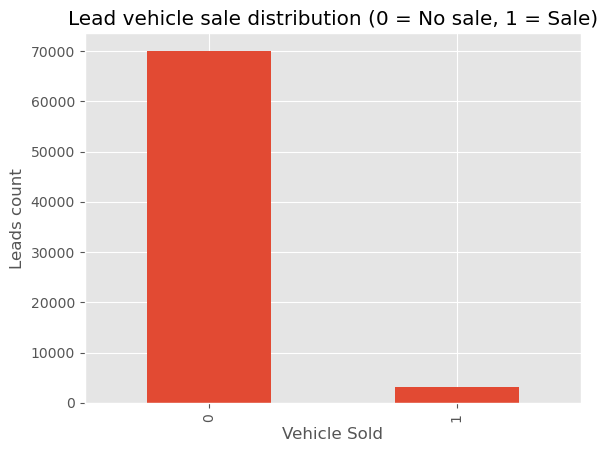

In [10]:
df['vehiclesold'].value_counts().plot(
    kind='bar', title='Lead vehicle sale distribution (0 = No sale, 1 = Sale)', xlabel='Vehicle Sold', 
    ylabel='Leads count', legend=None
)
plt.show()

In [11]:
# dealers
n_dealers = df['dealer'].nunique()
df['dealer'].unique()

array(['Motus Chery Germiston', 'Renault Northcliff - 70045',
       'Durban Multifranchise - 70111', 'Lindsay Saker VW Germiston',
       'Hyundai Menlyn', 'Alberton Multifranchise -70051',
       'Motus Toyota Cape Gate', 'Motus Chery Polokwane',
       'Table View Multifranchise - 70138', 'Kia Vereeniging',
       'Nelspruit Multifranchise - 70024', 'Cargo Motors Rustenburg',
       'Kia Bloemfontein', 'Cape Town Multifranchise - 70109',
       'Motus Toyota & Lexus Nelspruit',
       'Mercedes-Benz Westrand (Constantia Kloof)',
       'Renault Bryanston - 70001', 'Motus Renault Tygervalley - 70164',
       'Motus Toyota Bryanston', 'Motus Renault Bryanston Virtual',
       'Motus Renault Menlyn - 70114', 'Fourways Multifranchise - 70142',
       'Lindsay Saker VW Welkom', 'Renault Pinetown - 70050',
       'Motus Toyota Parktown', 'East Rand Multifranchise - 70043',
       'Motus Toyota Kempton Park', 'Motus Toyota Bedfordview',
       'Lindsay Saker VW Kempton Park', 'Motus Nissan

# 1. Data Cleaning

----

In [12]:
# missing values?
df.isna().sum()

customerid              0
leadid                  0
dtleadcreated           0
dtleadallocated         0
dealer                  0
leadsource              0
leadtype                0
seek                    0
interestmake         1230
interestmodel        6845
obsfullname             0
obsemail             7787
domain               7787
cellprefix              0
cellphonenolength       0
hourofenquiry           0
dayofenquiry            0
vehiclesold             0
dtype: int64

In [13]:
# are there customers which did not fill in interestname and interestmodel but eventually bought a vehicle?

vehicle_sold_df = df[df['vehiclesold'] == 1]
vehicle_sold_df.isna().sum()

customerid             0
leadid                 0
dtleadcreated          0
dtleadallocated        0
dealer                 0
leadsource             0
leadtype               0
seek                   0
interestmake          21
interestmodel         55
obsfullname            0
obsemail             157
domain               157
cellprefix             0
cellphonenolength      0
hourofenquiry          0
dayofenquiry           0
vehiclesold            0
dtype: int64

In [14]:
vehicle_sold_df[vehicle_sold_df['domain'].isna()].head(2)

,customerid,leadid,dtleadcreated,dtleadallocated,dealer,leadsource,leadtype,seek,interestmake,interestmodel,obsfullname,obsemail,domain,cellprefix,cellphonenolength,hourofenquiry,dayofenquiry,vehiclesold
231,0E584EF8-DE17-46D3-9859-3A0094DAD86C,11209124,2025-02-18 14:12:00,2025-02-18 14:12:00,Kia Vereeniging,RR-Dealer Facebook Kia - WhatsApp,Facebook,New,Kia New Cars,NaN,XXXXXXX -XX XXXXXXX-,NaN,NaN,83,10,14,18,1
240,B9ED73C1-1ECE-4CCA-A799-1B54E8470FBE,11209259,2025-02-18 14:27:00,2025-02-18 14:27:00,Renault Pinetown - 70050,RR-Dealer Facebook Used-WhatsApp,Facebook,Used,Used Cars,NaN,XXXX XXXX ??,NaN,NaN,72,10,14,18,1


In [15]:
vehicle_sold_df[vehicle_sold_df['interestmake'].isna()].head(2)

,customerid,leadid,dtleadcreated,dtleadallocated,dealer,leadsource,leadtype,seek,interestmake,interestmodel,obsfullname,obsemail,domain,cellprefix,cellphonenolength,hourofenquiry,dayofenquiry,vehiclesold
884,20CB48F2-E865-4094-9DE6-7F45FBE8835C,11298217,2025-03-03 11:30:00,2025-03-03 11:45:00,Nelspruit Multifranchise - 70024,HSA-WEB-CALLMEBACK_GADS_DEALERNV,Other,Used,NaN,NaN,XXXXXXX XXXXXXXXX XXXXXXX,XXXXXXXXXXXX@gmail.com,@gmail.com,82,10,11,3,1
4974,F93FFAB3-BA75-4CBC-9F03-662101213017,10807584,2025-01-03 17:29:00,2025-01-03 17:31:00,Motus Renault Menlyn - 70114,RSA-Carfind,Carfind.co.za,New,NaN,Enquire - New Renault Kwid from R2 599pm No De...,XXXXX XXXXXXXXX,XXXXXXXX@gmail.com,@gmail.com,81,10,17,3,1


In [16]:
vehicle_sold_df['cellphonenolength'].describe()

count    3228.000000
mean        9.992875
std         0.178514
min         1.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: cellphonenolength, dtype: float64

In [17]:
vehicle_sold_df[vehicle_sold_df['cellphonenolength'] == 1]

,customerid,leadid,dtleadcreated,dtleadallocated,dealer,leadsource,leadtype,seek,interestmake,interestmodel,obsfullname,obsemail,domain,cellprefix,cellphonenolength,hourofenquiry,dayofenquiry,vehiclesold
50680,E835A0A2-E9DD-4EB3-A11B-4688CA2CD852,11415828,2025-03-19 01:18:00,2025-03-19 01:18:00,Kia Bloemfontein,KIA-CCPPG-SONET,Other,New,KIA,Sonet,XXXXX XXXXX,XXXXXXX@gmail.com,@gmail.com,0,1,1,19,1


In [18]:
# conclusion: we cannot drop missging values here

In [19]:
# are there duplicate leads?
df['leadid'].nunique(), n_observations

(73286, 73286)

In [20]:
df.columns

Index(['customerid', 'leadid', 'dtleadcreated', 'dtleadallocated', 'dealer',
       'leadsource', 'leadtype', 'seek', 'interestmake', 'interestmodel',
       'obsfullname', 'obsemail', 'domain', 'cellprefix', 'cellphonenolength',
       'hourofenquiry', 'dayofenquiry', 'vehiclesold'],
      dtype='object')

In [21]:
import re

email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
email = "XXXXXX.XXXX@za.ab-inbev.com"
is_valid = bool(re.fullmatch(email_regex, email))  # Returns True/False
is_valid

True

In [22]:
EMAIL_REGEX = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
DOMAIN_REGEX = r'^@[a-zA-Z0-9][a-zA-Z0-9.-]*\.[a-zA-Z]{2,}$'


def is_email_provided(email: str):
    return int(isinstance(email, str) and len(email) > 0)


def is_valid(string: str, type: str = 'email'):
    if not isinstance(string, str):
        return False 
    regex = EMAIL_REGEX if type == 'email' else DOMAIN_REGEX
    return int(bool(re.fullmatch(regex, string, flags=re.IGNORECASE)))

In [23]:
is_valid("@za.ab-inbev.com", type='domain')

1

In [24]:
df['is_valid_email'] = df['obsemail'].str.strip().apply(is_valid)
df['is_valid_domain'] = df['domain'].str.strip().apply(is_valid, args=('domain',))
df['is_valid_cell'] = df['cellphonenolength'].apply(lambda x: int(x == 10))
df['is_email_provided'] = df['obsemail'].str.strip().apply(is_email_provided)
df['fullname_length'] = df['obsfullname'].str.strip().apply(lambda x: len(x))

In [25]:
df[df['is_valid_domain']==False].dropna()[['obsemail', 'domain', 'is_valid_email', 'is_valid_domain']]

,obsemail,domain,is_valid_email,is_valid_domain
195,XXXXXXXXXXXXXXXXX8@.gmail. com,@.gmail. com,0,0
786,XXXXXXXXXXXXXXXXXXXX@com,@com,0,0
2253,XXXXXXXXXXX26@gmail,@gmail,0,0
2879,XXXXXXXXXXXXXXX04@gmail.com. com,@gmail.com. com,0,0
3141,XXXXXXXXXXXX@gmail,@gmail,0,0
...,...,...,...,...
71491,XXXXXXXX@gmail,@gmail,0,0
71818,XXXXXXXXXXXX7@gmail.com1,@gmail.com1,0,0
72218,XXXXXX@maphoso,@maphoso,0,0
72363,XXXXXXXXXXXXXXXXXXX@gmailcom,@gmailcom,0,0


In [26]:
df['is_valid_cell']

0        1
1        1
2        1
3        1
4        1
        ..
73281    1
73282    1
73283    1
73284    1
73285    1
Name: is_valid_cell, Length: 73286, dtype: int64

In [27]:
df['interestmake'] = df['interestmake'].fillna('NO INTEREST MAKE SELECTED')
df['interestmodel'] = df['interestmodel'].fillna('NO INTEREST MODEL SELECTED')

# 2. Feature Extraction

----

In [28]:



df['dtleadcreated'] = pd.to_datetime(df['dtleadcreated'])
df['dtleadallocated'] = pd.to_datetime(df['dtleadallocated'])


df[['dtleadallocated', 'dtleadcreated']].head()

,dtleadallocated,dtleadcreated
0,2025-02-17 11:47:00,2025-02-15 14:34:00
1,2025-02-15 14:50:00,2025-02-15 14:50:00
2,2025-02-17 09:01:00,2025-02-15 14:51:00
3,2025-02-15 14:57:00,2025-02-15 14:55:00
4,2025-02-15 15:04:00,2025-02-15 15:04:00


In [29]:
df['lead_response_time'] = df['dtleadallocated'] - df['dtleadcreated']

In [30]:
df['is_weekend_lead'] = df['dtleadcreated'].apply(lambda x: int(x.day_of_week >= 5))

df[['dtleadcreated', 'dtleadallocated', 'lead_response_time', 'is_weekend_lead']].tail()

,dtleadcreated,dtleadallocated,lead_response_time,is_weekend_lead
73281,2025-03-30 18:46:00,2025-03-31 10:30:00,0 days 15:44:00,1
73282,2025-03-30 18:48:00,2025-03-31 10:44:00,0 days 15:56:00,1
73283,2025-03-30 18:53:00,2025-03-30 18:53:00,0 days 00:00:00,1
73284,2025-03-30 18:59:00,2025-03-31 09:17:00,0 days 14:18:00,1
73285,2025-03-30 19:10:00,2025-03-31 09:12:00,0 days 14:02:00,1


In [31]:
df[df['is_weekend_lead'] == False][['dtleadcreated', 'dtleadallocated', 'lead_response_time', 'is_weekend_lead']].head()

,dtleadcreated,dtleadallocated,lead_response_time,is_weekend_lead
135,2025-02-18 07:42:00,2025-02-18 08:07:00,0 days 00:25:00,0
136,2025-02-14 15:07:00,2025-02-14 15:07:00,0 days 00:00:00,0
137,2025-02-18 07:52:00,2025-02-18 07:52:00,0 days 00:00:00,0
138,2025-02-17 15:14:00,2025-02-17 15:14:00,0 days 00:00:00,0
139,2025-02-18 08:02:00,2025-02-18 08:07:00,0 days 00:05:00,0


In [32]:
# if customer repeat
df['customer_leads_count'] = df.groupby('customerid')['customerid'].transform('count')

In [33]:
# df['is_coporate_email'] 
def is_coporate_email(is_email_valid, is_domain_valid, domain):
    if is_email_valid and is_domain_valid and not(domain == "@gmail.com"):
        return 1
    else:
        return 0

In [34]:
df.columns

Index(['customerid', 'leadid', 'dtleadcreated', 'dtleadallocated', 'dealer',
       'leadsource', 'leadtype', 'seek', 'interestmake', 'interestmodel',
       'obsfullname', 'obsemail', 'domain', 'cellprefix', 'cellphonenolength',
       'hourofenquiry', 'dayofenquiry', 'vehiclesold', 'is_valid_email',
       'is_valid_domain', 'is_valid_cell', 'is_email_provided',
       'fullname_length', 'lead_response_time', 'is_weekend_lead',
       'customer_leads_count'],
      dtype='object')

In [35]:
df['is_coporate_email'] = df.apply(lambda row: is_coporate_email(row['is_valid_email'], row['is_valid_domain'], row['domain']), axis=1)

In [36]:
df[df['is_coporate_email'] == 1][['obsemail', 'domain', 'is_coporate_email']].head()

,obsemail,domain,is_coporate_email
5,XXXXXXXXXXXXXXX@icloud.com,@icloud.com,1
18,XXXXXXX@ymail.com,@ymail.com,1
19,XXXXXXXXXXXXX@gmail.com,@gmail.com,1
44,XXXXXXXXXXXXX@reclam.co.za,@reclam.co.za,1
56,XXXXXXXXX@gmail.co.za,@gmail.co.za,1


In [37]:
for domain in df[df['is_valid_email'] == 1]['domain'].unique():
    print(domain)

@gmail.com
@icloud.com
@ymail.com
@gmail.com 
@reclam.co.za
@gmail.co.za
@intertek.com
@csrnews.africa
@buildmor.co.za
@yaho.com
@makwandem.co.za
@outlook.co.za
@er-plumbing.co.za
@yahoo.com
@tekwani.co.za
@alliedsteelrode.co.za
@hotmail.co.za
@hotmail.com
@gauteng.gov.za
@landbco.com
@joburg.org.za
@vanzyksinc.co.za
@unisa.ac.za
@bex.co.za
@live.com
@percom.co.za
@advania.co.uk
@mweb.co.za
@r-e-d.online
@ICLOUD.COM
@gmail.com.za
@afdb.org
@gmail.comm
@adss.co.za
@econorisk.co.za
@mail.com
@live.co.za
@state.gov
@YAHOO.COM
@gmail.cin
@myuwc.ac.za
@ifs4life.ac.za
@adcomsa.com
@llg.co.za
@gi.com
@GMAILK.COM
@gmail.comdfgjj
@GMAILK.COMh
@gmal.com 
@apronto.co.za
@fairmile.co.za
@unetics.co.za
@GMAIL.COMfgkytuhfgytghgjfyhfg
@mandela.ac.za
@ekurhuleni.gov.za
@rocketmail.com
@hshdxzzxccxxdcxdsxcxdscxzssdddfsdfsdsx.com
@gmail.coml
@dbe.gov.za
@nwpg.gov.za
@GMAIL.COMfghfdujytg
@gmail.comgjk
@gmail.comgffgh
@rcssa.com
@GMAIL.COMfghfdujytgtyytu
@gmail.comhjjtbuyi
@roos-ch.com
@outlook.com
@kiddi

In [38]:
df.iloc[72218]

customerid              072EB05C-5B38-404B-8DDD-A58A60C04D6F
leadid                                              11503026
dtleadcreated                            2025-03-30 19:32:00
dtleadallocated                          2025-03-30 19:32:00
dealer                     Table View Multifranchise - 70138
leadsource                  MS-Display-NoPrice-NextLevel-CPC
leadtype                                               Other
seek                                                    Used
interestmake                                         Hyundai
interestmodel                            i20 1.4 Motion auto
obsfullname                                    XXXXXX XXXXXX
obsemail                                      XXXXXX@maphoso
domain                                              @maphoso
cellprefix                                                76
cellphonenolength                                         10
hourofenquiry                                             19
dayofenquiry            

In [39]:
import tldextract

def is_valid_tld(domain):
    extracted = tldextract.extract(domain.lstrip('@').lower())
    return bool(extracted.suffix)

In [40]:
is_valid_tld('@GMAIL.COMfgkytuhfgytghgjfyhfg')

False

In [41]:
free_providers = {"gmail.com", "yahoo.com", "hotmail.com", "outlook.com", "icloud.com"}

def is_free_email(domain):
    clean_domain = domain.lstrip('@').lower()
    return any(
        clean_domain.endswith(free_provider) for free_provider in free_providers
    )

In [42]:
is_free_email('@GMAIL.COM')

True

In [43]:
from Levenshtein import distance

def is_typo_of_popular(domain, max_distance=4):
    domain_clean = domain.lstrip('@').lower()
    for provider in free_providers:
        if 0 < distance(domain_clean, provider) <= max_distance:
            return True
    return False

is_typo_of_popular(domain='@ousstlook.coml')

True

In [44]:
import dns.resolver

def has_mx_records(domain):
    domain_clean = domain.lstrip('@')
    try:
        mx_records = dns.resolver.resolve(domain_clean, 'MX')
        return len(mx_records) > 0
    except:
        return False

In [45]:
has_mx_records('@gautend.gov.za')

False

In [46]:
# def is_valid_email(email:str, domain:str):
#     # first check if the domain itself is valid
    

In [47]:
# manually extract useful information from the dealer column
dealer_group = [
 'Chery', 'Renault', 'None', 'VW', 'Hyundai', 'None', 'Toyota', 'Chery',
 'None', 'Kia', 'None', 'Mercedes-Benz', 'Kia', 'None', 'Toyota & Lexus',
 'Mercedes-Benz', 'Renault', 'Renault', 'Toyota', 'Renault',
 'Renault', 'None', 'VW', 'Renault', 'Toyota', 'None', 'Toyota',
 'Toyota', 'VW', 'Nissan', 'None', 'Renault', 'Renault', 'Mazda',
 'None', 'VW', 'Kia', 'VW', 'None', 'Toyota', 'Audi', 'None', 'Ford',
 'None', 'Audi', 'MG', 'Audi', 'VW', 'Renault', 'Renault',
 'Peugeot & Citroën', 'Nissan', 'BMW', 'Nissan', 'Mercedes-Benz',
 'Omoda & Jaecoo', 'VW', 'Ford', 'None', 'Isuzu', 'Honda', 'MG',
 'Mercedes-Benz', 'VW', 'Haval', 'Mazda', 'Nissan', 'Ford', 'Isuzu',
 'VW', 'Mazda', 'Ford', 'None', 'Renault', 'Mercedes-Benz',
 'Jaguar & Land Rover', 'Audi', 'Nissan', 'Ford', 'Isuzu', 'Isuzu',
 'None', 'None', 'Renault', 'Toyota', 'Ford', 'Ford', 'JETOUR',
 'Chery', 'JETOUR', 'Kia', 'Subaru', 'VW', 'LDV', 'BMW', 'Isuzu',
 'Opel', 'Haval', 'Mitsubishi', 'Isuzu', 'BMW', 'Mercedes-Benz',
 'Honda', 'MG', 'Volvo', 'Renault', 'Isuzu & Honda', 'Mitsubishi',
 'None', 'Fiat & Jeep', 'Isuzu', 'Mercedes-Benz', 'BMW', 'Jaguar & Land Rover', 'BMW'
]


dealer_city = [
    'Germiston', 'Northcliff', 'Durban', 'Germiston', 'Menlyn', 'Alberton', 'Cape Gate',
    'Polokwane', 'Table View', 'Vereeniging', 'Nelspruit', 'Rustenburg', 'Bloemfontein',
    'Cape Town', 'Nelspruit', 'Westrand', 'Bryanston', 'Tygervalley', 'Bryanston',
    'Bryanston', 'Menlyn', 'Fourways', 'Welkom', 'Pinetown', 'Parktown', 'East Rand',
    'Kempton Park', 'Bedfordview', 'Kempton Park', 'Centurion', 'Roodepoort',
    'Vereeniging', 'Zambezi', 'George', 'Polokwane', 'Alberton', 'Menlyn',
    'Bloemfontein', 'Tzaneen', 'City', 'Bryanston', 'George', 'Culemborg', 'Tokai',
    'Sandton', 'Menlyn', 'Bloemfontein', 'East Rand Mall', 'Wonderwaters', 'Centurion',
    'Bloemfontein', 'Menlyn', 'Vereeniging', 'Parow', 'Sandton', 'Rustenburg',
    'Midrand', 'Kempton Park', 'Bloemfontein', 'Vereeniging', 'West Rand', 'Northcliff',
    'Bedfordview', 'Edenvale', 'Tzaneen', 'Germiston', 'East Rand Mall', 'Diep River',
    'Bloemfontein', 'Fourways', 'Cape Town', 'Germiston', 'Bedfordview', 'Parow',
    'The Glen', 'George', 'Vereeniging', 'Tygervalley', 'Kroonstad', 'Isando',
    'Isando', 'Vereeniging', 'Polokwane', 'Bloemfontein', 'Strijdompark', 'George',
    'Paarden Eiland', 'Cape City', 'Kroonstad', 'Tzaneen', 'Kimberley', 'West Rand',
    'Vereeniging', 'Boksburg', 'Bloemfontein', 'Bloemfontein', 'Bloemfontein',
    'Kempton Park', 'Clearwater', 'Zambezi', 'George', 'Bryanston', 'West Rand',
    'Roodepoort', 'Bloemfontein', 'Online', 'Kimberley', 'Zambezi', 'East Rand Mall',
    'Bloemfontein', 'Vereeniging', 'Rustenburg', 'George', 'Bloemfontein'
]


In [48]:
def apply_dealer_city(dealer):
    for city in dealer_city:
        if dealer.find(city) >= 0:
            return city
            
df['dealer_city'] = df['dealer'].apply(apply_dealer_city)

In [49]:
def apply_dealer_group(dealer):
    for group in dealer_group:
        if dealer.find(group) >= 0:
            return group
        
df['dealer_group'] = df['dealer'].apply(apply_dealer_group)

<Axes: xlabel='dealer_group'>

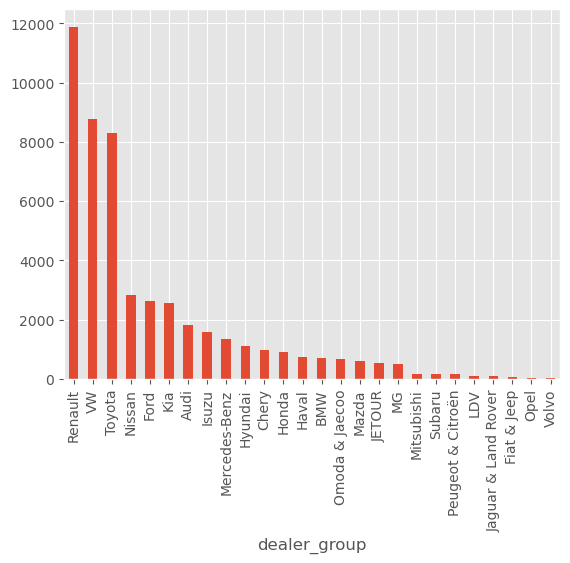

In [50]:
df['dealer_group'].value_counts().plot(kind='bar')

<Axes: xlabel='dealer_city'>

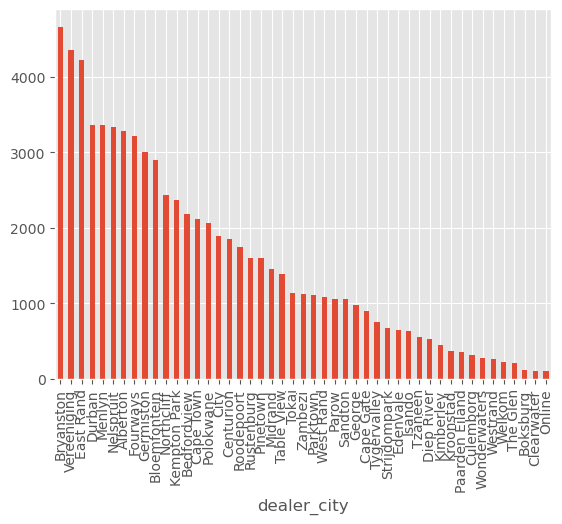

In [51]:
df['dealer_city'].value_counts().plot(kind='bar')

In [52]:
df.head()

,customerid,leadid,dtleadcreated,dtleadallocated,dealer,leadsource,leadtype,seek,interestmake,interestmodel,...,is_valid_domain,is_valid_cell,is_email_provided,fullname_length,lead_response_time,is_weekend_lead,customer_leads_count,is_coporate_email,dealer_city,dealer_group
0,D3B8E20E-F798-4CA9-94EE-FF6D0E7E99F2,11187465,2025-02-15 14:34:00,2025-02-17 11:47:00,Motus Chery Germiston,DEALER FACEBOOK,Facebook,New,Chery,Tiggo 4 Pro 1.5 LIT MIT,...,1,1,1,20,1 days 21:13:00,1,2,0,Germiston,Chery
1,372AB00B-6A1C-45D1-8D29-29287C627D3B,11187550,2025-02-15 14:50:00,2025-02-15 14:50:00,Renault Northcliff - 70045,RR-Dealer Facebook-Renault,Facebook,New,Renault,Triber,...,1,1,1,12,0 days 00:00:00,1,1,0,Northcliff,Renault
2,74262064-94E9-4E7E-9C01-CA8405243929,11187564,2025-02-15 14:51:00,2025-02-17 09:01:00,Durban Multifranchise - 70111,KIA-CCPPG-SONET,Other,New,KIA,Sonet,...,1,1,1,12,1 days 18:10:00,1,1,0,Durban,None
3,F4D65935-310B-455D-B414-1759C3B807F7,11187583,2025-02-15 14:55:00,2025-02-15 14:57:00,Lindsay Saker VW Germiston,Group Website VW: Specials,Website,New,Volkswagen,Polo Vivo,...,1,1,1,18,0 days 00:02:00,1,1,0,Germiston,VW
4,A732E82D-B4BE-438C-9690-07AB3EFD9CD4,11187615,2025-02-15 15:04:00,2025-02-15 15:04:00,Durban Multifranchise - 70111,TikTok,TikTok,New,Renault,Kwid,...,1,1,1,24,0 days 00:00:00,1,1,0,Durban,None


In [53]:
df.columns

Index(['customerid', 'leadid', 'dtleadcreated', 'dtleadallocated', 'dealer',
       'leadsource', 'leadtype', 'seek', 'interestmake', 'interestmodel',
       'obsfullname', 'obsemail', 'domain', 'cellprefix', 'cellphonenolength',
       'hourofenquiry', 'dayofenquiry', 'vehiclesold', 'is_valid_email',
       'is_valid_domain', 'is_valid_cell', 'is_email_provided',
       'fullname_length', 'lead_response_time', 'is_weekend_lead',
       'customer_leads_count', 'is_coporate_email', 'dealer_city',
       'dealer_group'],
      dtype='object')

In [54]:
df[['obsemail', 'is_coporate_email']]

,obsemail,is_coporate_email
0,XXXXXXXXXXXXXXXXXXX5@gmail.com,0
1,XXXXXXXX@gmail.com,0
2,XXXXXXXXX39@gmail.com,0
3,XXXXXXXXXX@gmail.com,0
4,XXXXXXXXXX12@gmail.com,0
...,...,...
73281,XXXXXXXXXXXX1@outlook.com,1
73282,XXXXXXXXXXXXX@gmail.com,0
73283,XXXXXXXXXX@gmail.com,0
73284,XXXXXXXXXX1@gmail.com,0


<Axes: xlabel='dealer_city'>

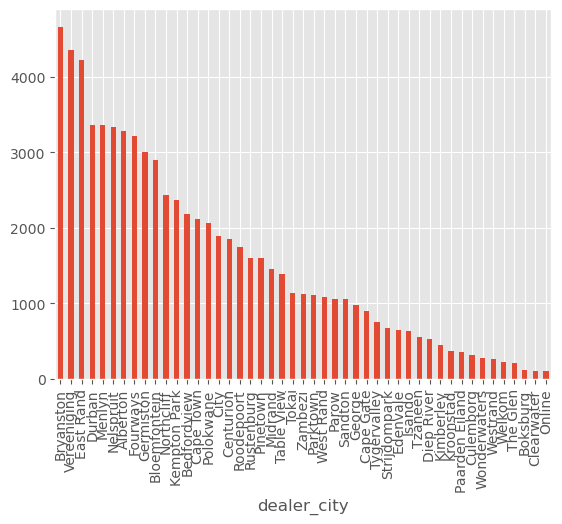

In [56]:
df['dealer_city'].value_counts().plot(kind='bar')

In [ ]:
less_frequent_dealer_cities

In [60]:
dealer_city_info = df['dealer_city'].value_counts()

In [66]:
less_frequent_dealer_cities = dealer_city_info[dealer_city_info > dealer_city_info['Tokai']].index.values

In [68]:
df['dealer_city'] = df['dealer_city'].apply(lambda city: "Other" if city in less_frequent_dealer_cities else city)

In [70]:
df['leadtype'].unique()

array(['Facebook', 'Other', 'Website', 'TikTok', 'CPC', 'AutoTrader',
       'Kia Retail', 'Cars.co.za', 'Carfind.co.za'], dtype=object)

In [71]:
df['seek'].unique()

array(['New', 'Used'], dtype=object)

In [77]:
df['interest_vehicle_description'] = df['interestmake'] +' '+ df['interestmodel']

In [78]:
bins = [0, 4, 7, 12, 17, 21, 24]
labels = ['night', 'dawn', 'morning', 'afternoon', 'evening', 'night']

pd.cut(df['hourofenquiry'], bins=bins, labels=labels, right=False,ordered=False)

0        afternoon
1        afternoon
2        afternoon
3        afternoon
4        afternoon
           ...    
73281      evening
73282      evening
73283      evening
73284      evening
73285      evening
Name: hourofenquiry, Length: 73286, dtype: category
Categories (5, object): ['afternoon', 'dawn', 'evening', 'morning', 'night']

In [79]:
df['hourofenquiry']

0        14
1        14
2        14
3        14
4        15
         ..
73281    18
73282    18
73283    18
73284    18
73285    19
Name: hourofenquiry, Length: 73286, dtype: int64

In [80]:
df['cellprefix'].unique()

array(['61', '83', '79', '71', '67', '73', '76', '66', '78', '63', '74',
       '72', '81', '84', '82', '60', '62', '64', '68', '65', '69', '26',
       '31', '11', '87', '27', '12', '33', '0+3', '89', '34', '25', '0+2',
       '75', '77', '0', '10', '32', '21', '97', '22', '88', '16', '13',
       '14', '99', '58', '38', '18', '51', '23', '55', '86', '15', '44',
       '70', '17', '0+1', '35', '98', '52', '28', '0+9', '59', '92', '7',
       '41', '90', '24', '0+4', '0+0', '80', '93', '57', '36', '96', '85',
       '53', '0+7', '56', '39', '54', '0+6', '42', '95', '49', '268',
       '45', '337', '0+8', '263', '0+5', '94', '8', '19', '1', '37', '91',
       '40', '9', '2', '20', '30', '43', '5'], dtype=object)

In [81]:
valid_cell_prefixes = [cell_prefix for cellprefix in df['cellprefix'].unique() if len(cell_prefix) == 2 else 'Not Valid' ]

SyntaxError: invalid syntax (1577059518.py, line 1)

In [85]:
valid_cell_prefixes = []

for cellprefix in df['cellprefix'].unique():
    if len(cellprefix) == 2:
        if int(cellprefix[0]) < 9:
            valid_cell_prefixes.append(cellprefix)

np.array(valid_cell_prefixes)

array(['61', '83', '79', '71', '67', '73', '76', '66', '78', '63', '74',
       '72', '81', '84', '82', '60', '62', '64', '68', '65', '69', '26',
       '31', '11', '87', '27', '12', '33', '89', '34', '25', '75', '77',
       '10', '32', '21', '22', '88', '16', '13', '14', '58', '38', '18',
       '51', '23', '55', '86', '15', '44', '70', '17', '35', '52', '28',
       '59', '41', '24', '80', '57', '36', '85', '53', '56', '39', '54',
       '42', '49', '45', '19', '37', '40', '20', '30', '43'], dtype='<U2')

In [90]:
df['is_valid_cellprefix'] = df['cellprefix'].apply(lambda x: int(x in valid_cell_prefixes))

In [89]:
def is_coporate_cell(prefix:str, is_prefix_valid:bool)->bool:
    return int(1<=int(prefix[0])<=5 and is_prefix_valid)  


In [94]:
df['is_coporate_cell'] = df.apply(lambda row: int(1<=int(row['cellprefix'][0])<=5 and row['is_valid_cellprefix']), axis=1)